## Proyecto de Data Science (Predicción de una enfermedad coronaria)

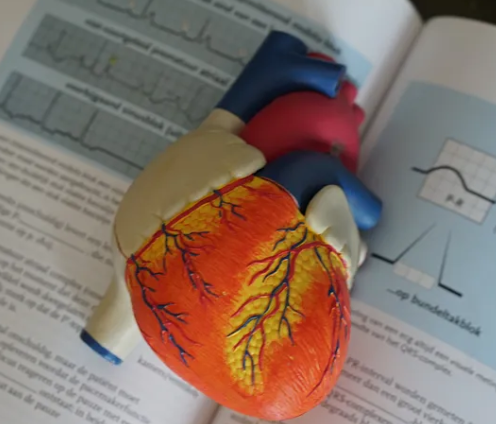

### Indice

#### 1) Introducción (Abstract)
#### 2) Conjunto de datos
#### 3) Data Wrangling & EDA (Exploratory Data Analysis)
#### 4) Detección y remoción de Outliers
#### 5) Elección de un método de feature selection para reducir la dimensionalidad del dataset
#### 6) Elección de un algoritmo de regresión o clasificación para entrenar con los datos elegidos
        6.1) Generación de cálculo de métricas para validar el modelo que seleccionemos
                6.1.1) Regresión Logistica
                6.1.2) SVM
                6.1.3) KNN
                6.1.4) Decision Tree
                6.1.5) Random Forest

        6.2) Conclusiones con respecto a los resultados obtenidos.
                6.2.1) Random Forest (optimización)


****************************

## 1) Introducción - Proyecto de Data Science (Predicción de una enfermedad coronaria)

##### En este estudio, presentamos un dataset que tiene como fin para predecir la presencia de enfermedad coronaria utilizando técnicas de Data Science. La enfermedad coronaria es una afección cardiovascular grave que afecta a millones de personas en todo el mundo y representa una de las principales causas de morbimortalidad. El objetivo principal de este proyecto es desarrollar un modelo predictivo preciso y confiable que pueda identificar tempranamente a los individuos en riesgo de desarrollar enfermedad coronaria, lo que permitiría una intervención médica oportuna y potencialmente reducir las complicaciones asociadas.

##### El dataset utilizado en este estudio contiene una amplia variedad de características clínicas, recopiladas de una población diversa de pacientes. Estas características incluyen datos como la edad (AGE), el género (SEX), tipo de dolor en el pecho (CP), presión sanguinea (trestbps), colesterol (CHOL), nivel de azúcar en sangre (FBS), resultado de electrocardiograma en reposo (RESTECG), frecuencia cardíaca máxima alcanza durante una prueba de esfuerzo (THALACH), paciente con angina (EXANG), descenso del segmento ST (OLDPEAK), pendiente del segmente ST durante la parte más exigente del ejercicio (SLOPE), resultado del flujo sanguineo con tinte radioactivo (THAL), número de vasos sanguineos principales coloreados por tinte radioactivo (CA), la variable objetivo en el dataset indica la presencia o ausencia de enfermedad coronaria (TARGET).

##### Para abordar este problema, se aplicarán diversas técnicas de Data Science, donde compararemos varios modelos y veremos como se comparta cada uno y cual tiene más probabilidad de exitos dado lo que buscamos predecir

##### El análisis de este dataset y el desarrollo del modelo predictivo tienen el potencial de proporcionar una valiosa herramienta para la detección temprana y la prevención de la enfermedad coronaria. Los resultados obtenidos podrían ayudar a los profesionales de la salud a identificar de manera más precisa a las personas con alto riesgo y a implementar estrategias de intervención adecuadas. Además, este estudio también puede revelar relaciones y patrones ocultos entre las características estudiadas, lo que podría conducir a una mejor comprensión de los factores de riesgo asociados con la enfermedad coronaria

## 2) Conjunto de datos

#### El conjunto de datos ha sido tomado de UCI Machine Learning Repository. Tenemos alrededor de 300 pacientes y las variables recogidas están descritas a conitnuación.

* [age] edad (#)
* [sex] sexo : 1= Masculino, 0= Femenino (Binario)
* [chest_pain] (cp)tipo de dolor torácico (4 valores -Ordinal):Valor 1: angina típica ,Valor 2: angina atípica, Valor 3: dolor no anginoso , Valor 4: asintomático 
* [resting_blood_pressure] (trestbps) presión arterial en reposo (#)
* [cholesterol] (chol) colesterol sérico en mg/dl (#)
* [fasting_blodd_sugar] (fbs)glucemia en ayunas > 120 mg/dl(Binario)(1 = verdadero; 0 = falso)
* [rest_ecg] (restecg) resultados electrocardiográficos en reposo(valores 0,1,2)
* [thalach] (thalach) frecuencia cardiaca máxima alcanzada(#)
* [exercise_induced_angina] (exang) angina inducida por el ejercicio (binario) (1 = sí; 0 = no)
* [st_depression] (oldpeak) = depresión del ST inducida por el ejercicio en relación con el reposo (#)
* [st_slope] (pendiente) del segmento ST pico del ejercicio (ordinal) (Valor 1: pendiente ascendente , Valor 2: plano , Valor 3: pendiente descendente )
* [number_of_vessels] (ca) número de vasos principales (0-3, ordinal) coloreados por fluoroscopia
* [maximum_heart_rate] (thal) frecuencia cardiaca máxima alcanzada - (Ordinal): 3 = normal; 6 = defecto fijo; 7 = defecto reversible


## 3) Data Wrangling & EDA (Exploratory Data Analysis)

In [34]:
# Primero importamos las librerias a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from scipy import stats

In [2]:
# Importamos el dataset a utilizar 

datasetI = pd.read_csv('dataset.csv')

# Con la función info(), nos va a dar una descripción general de nuestro conjunto de datos, 
# lo que nos va a ayudar a entender mejor su estructura y a tomar decisiones sobre cómo
# manipular o limpiar los datos en función de la información que obtenemos

datasetI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
# Posteriormente hacemos un describe para generar estadísticas descriptivas que 
# nos proporcionarán información útil sobre los datos con los cuales vamos a trabaja

datasetI.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Verifcamos la correlación entre columnas
print(datasetI.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


##### Esto muestra que la mayoría de las columnas están moderadamente correlacionadas con nuestro objetivo, pero 'fbs' está débilmente correlacionada.


## 4) Detección y remoción de Outliers

#### Un valor atípico (putlier) es un valor extremadamente grande o pequeño en relación con el resto del conjunto de datos. Puede tratarse de un error cuando se realizo la introducción de datos o de datos auténticos, que realmente son atipicos y pueden llegar a generarnos ruido en nuestra generalización

![Alt text](image.png)

#### filtramos características como age , resttecg en reposo, chol y thal, características númericas que pueden llegar a tener valores atípicos

In [33]:
data_fil = datasetI[['age','restecg','chol','thal']]
data_fil.head()

,age,restecg,chol,thal
0,63,0,233,1
1,37,1,250,2
2,41,0,204,2
3,56,1,236,2
4,57,1,354,2


#### Vamos a hacer el cálculo de la puntuación z de las columnas numéricas del conjunto de datos

In [35]:
z = np.abs(stats.zscore(data_fil))
print(z)

          age   restecg      chol      thal
0    0.952197  1.005832  0.256334  2.148873
1    1.915313  0.898962  0.072199  0.512922
2    1.474158  1.005832  0.816773  0.512922
3    0.180175  0.898962  0.198357  0.512922
4    0.290464  0.898962  2.082050  0.512922
..        ...       ...       ...       ...
298  0.290464  0.898962  0.101730  1.123029
299  1.033002  0.898962  0.342756  1.123029
300  1.503641  0.898962  1.029353  1.123029
301  0.290464  0.898962  2.227533  1.123029
302  0.290464  1.005832  0.198357  0.512922

[303 rows x 4 columns]


##### Es difícil decir qué puntos son atípicos, por lo que vamos a tener que definir un umbral

In [36]:
threshold = 3
print(np.where(z > 3))

(array([ 28,  48,  85, 220, 246, 281], dtype=int64), array([2, 3, 2, 2, 2, 3], dtype=int64))


####  La primera matriz contiene la lista de números de fila y la segunda matriz los respectivos números de columna, lo que significa que z[28][2] tiene una puntuación Z superior a 3. Hay un total de 6 puntos de datos que son valores atípicos.

#### Por lo cual en el siguiente punto vamos a filtrar los valores atípicos conservando sólo los puntos de datos que están por debajo del umbral

In [41]:
datasetI.shape

(303, 14)

In [45]:
datasetII = datasetI[(z < 3).all(axis=1)]
datasetII.shape

(297, 14)

In [46]:
datasetII.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 5) Elección de un método de feature selection para reducir la dimensionalidad del dataset


#### * En nuestro caso vamos a avanzar con el Forward Selection


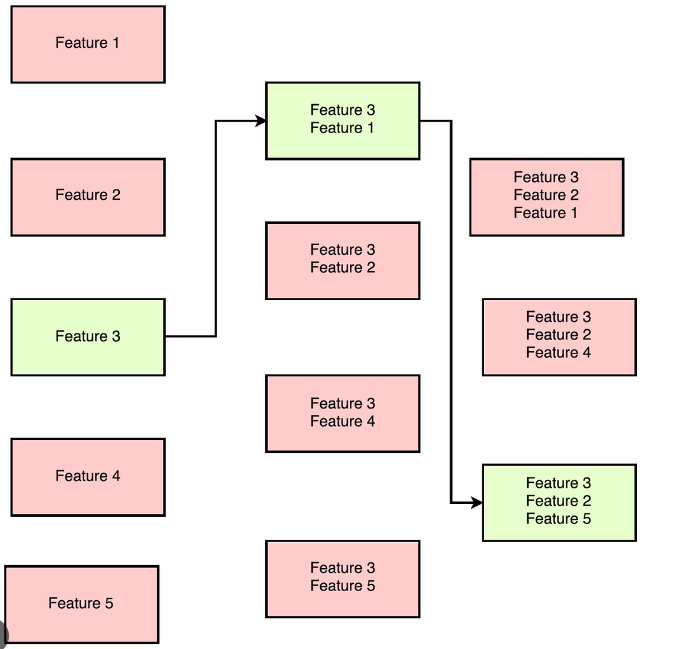

In [47]:
datasetII['target'] = datasetII.target
X = datasetII.drop("target", 1)       # feature matrix
y = datasetII['target']               # target feature
datasetII.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [49]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 297, dtype: int64

####  Los pasos para la tecnica de selección son los siguientes;

##### 1. Elija un nivel de significancia (por ejemplo, SL = 0.05 con un 95% de confianza).

##### 2. Ajuste todos los modelos de regresión simple posibles considerando una característica a la vez. Los modelos totales 'n' son posibles. Seleccione la característica con el valor p más bajo.

##### 3. Ajuste todos los modelos posibles con una característica adicional agregada a las características seleccionadas anteriormente.

##### 4. Nuevamente, seleccione la función con un valor p mínimo. si $p_v <alpha$, vaya al Paso 3; de lo contrario, finalice el proceso.

In [51]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

#### Esta función anterior acepta datos, variable objetivo y nivel de significancia como argumentos y devuelve la lista final de características significativas basadas en valores p a través de la selección hacia adelante.

In [52]:
forward_selection(X, y)

['thalach', 'thal', 'ca', 'cp', 'oldpeak', 'sex', 'exang']

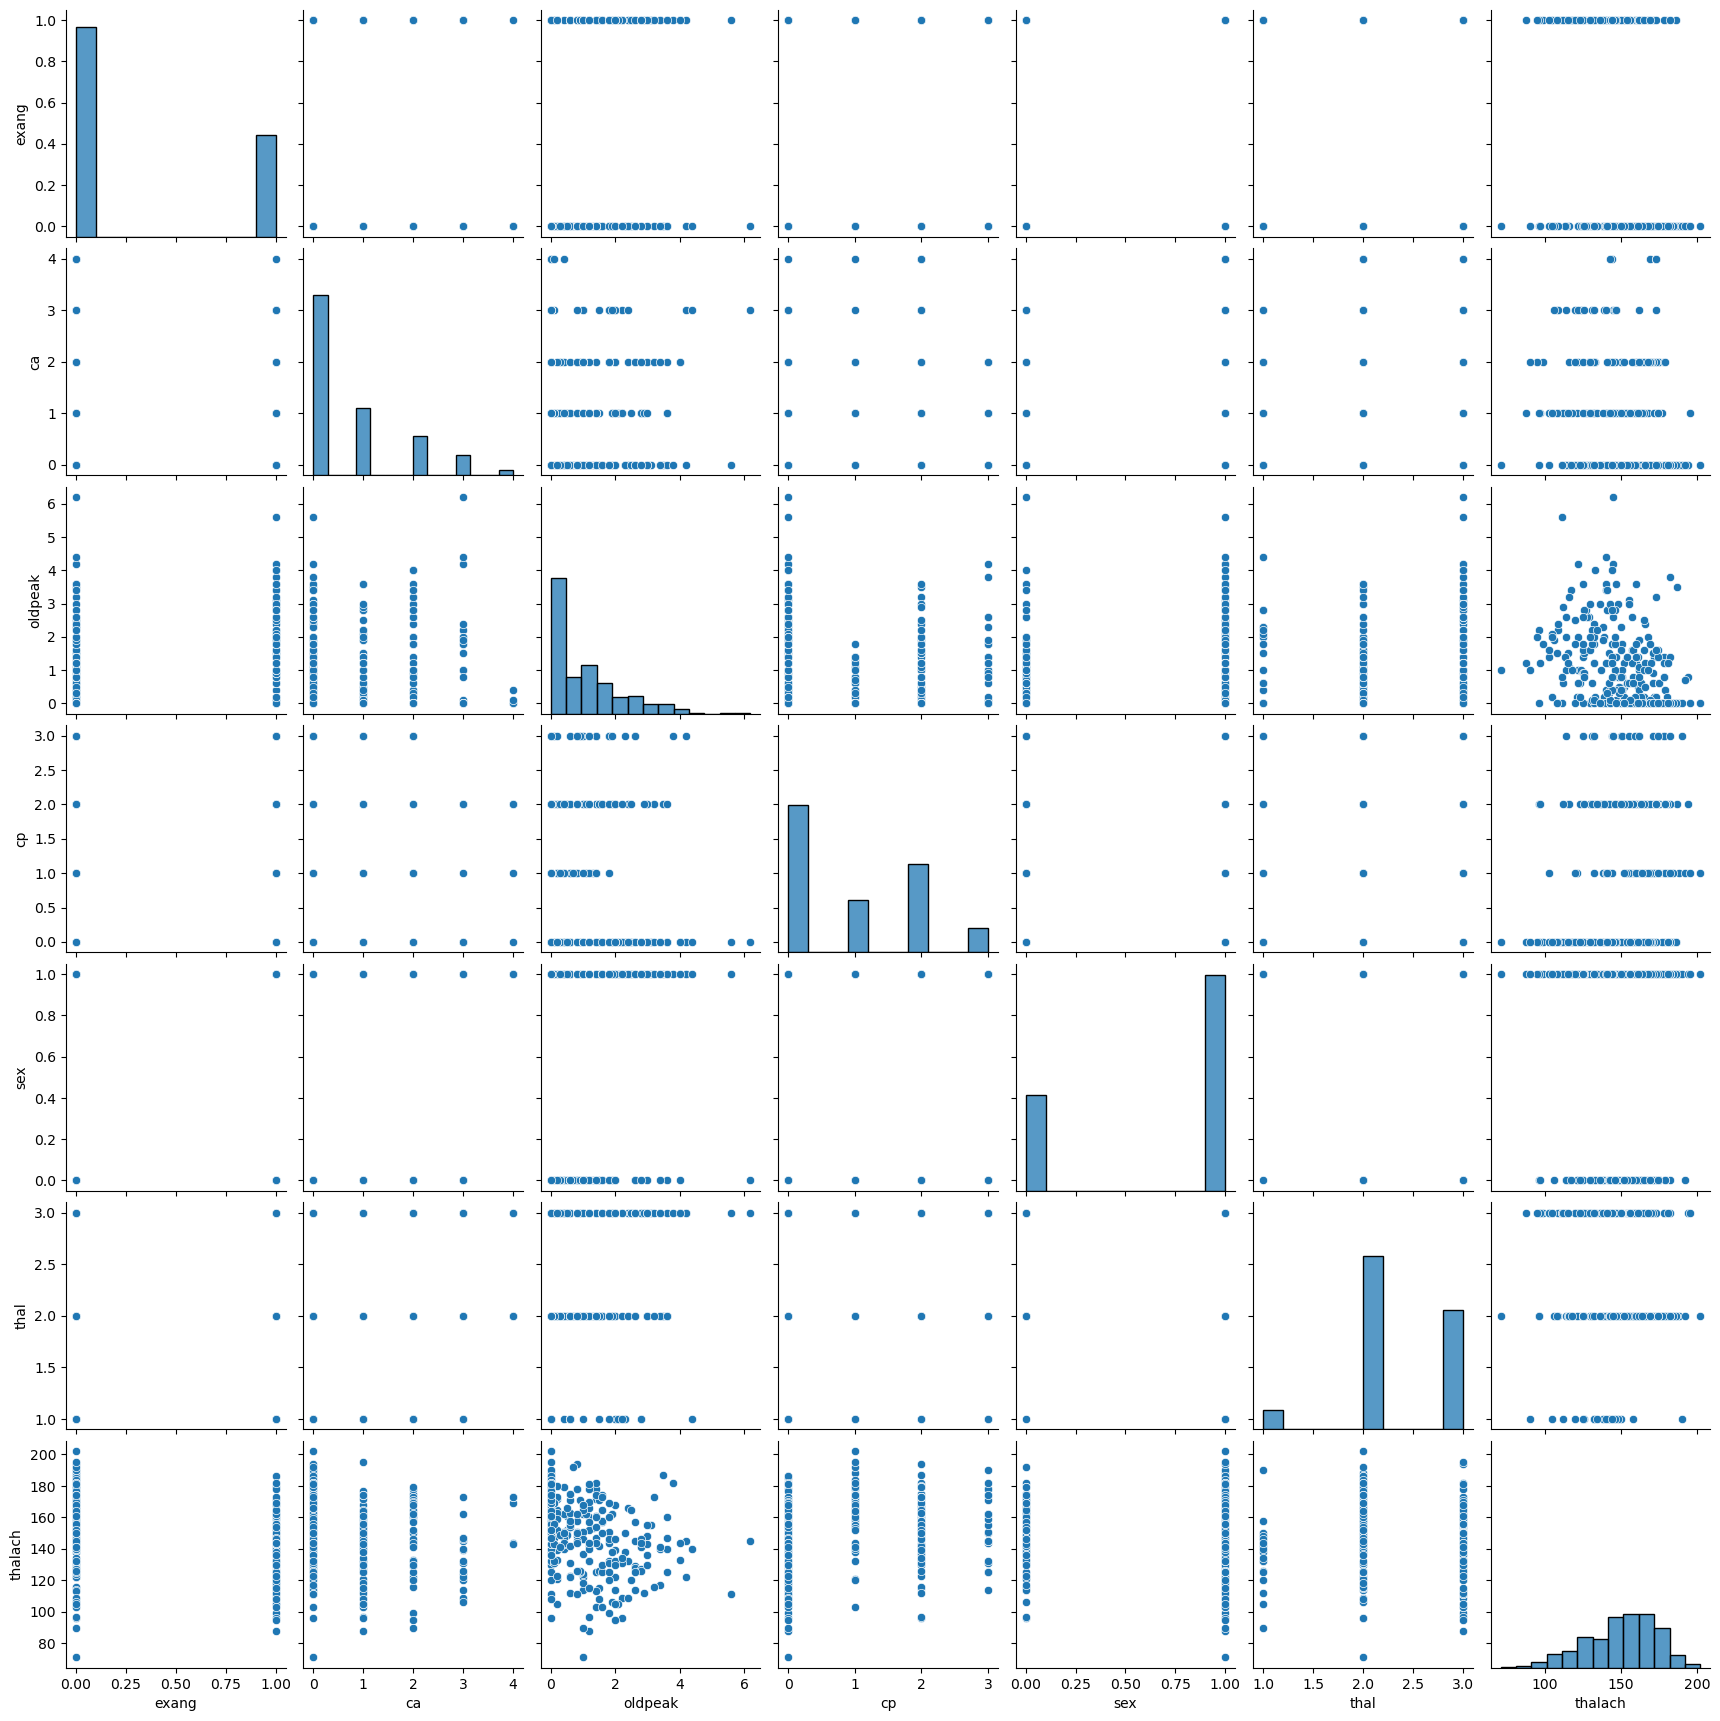

In [53]:
subData = datasetII[['exang', 'ca', 'oldpeak', 'cp', 'sex', 'thal', 'thalach']]
sns.pairplot(subData)

*******************************************

### 6) Elección de un algoritmo de regresión o clasificación para entrenar con los datos elegidos 


##### Primero vamos a importar la función 'train_test_split del módulo 'model_selection' de la biblioteca scikit-learn (sklearn). Esta función la vamos a utilizar en el proceso de entrenamiento y evaluación de modelos de aprendizaje automático.

##### La idea es utilizar el conjunto de entrenamiento para ajustar el modelo a los datos y luego evaluar su rendimiento en el conjunto de prueba para obtener una estimación de su capacidad para generalizar

In [54]:
from sklearn.model_selection import train_test_split

predictors = datasetII.drop("target",axis=1)
target = datasetII["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

##### La función 'train_test_split' toma varios argumentos, siendo el más importante el conjunto de datos que se va a dividir
* 'test_size' o 'train_size', especifican la proporción de datos que se asignará al conjunto de prueba o entrenamiento, respectivamente

In [55]:
X_train.shape

(237, 13)

In [56]:
X_test.shape

(60, 13)

In [57]:
Y_train.shape

(237,)

In [58]:
Y_test.shape

(60,)

    6.1) Generación de cálculo de métricas para validar el modelo que seleccionemos


#### La función 'accuracy_score' del módulo 'metrics' la vamos a utilizar para evaluar la precisión o el rendimiento del modelo

In [59]:
from sklearn.metrics import accuracy_score

*********************************

#### Con todo liso empezamos a probar los algoritmos

    6.1.1) Regresión Logistica

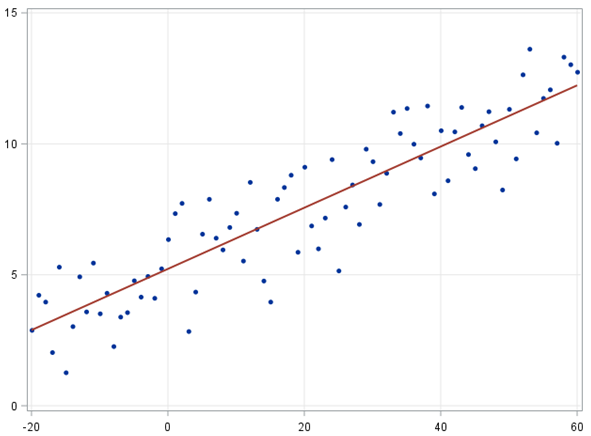

In [60]:
from sklearn.linear_model import LogisticRegression

lregression = LogisticRegression()
lregression.fit(X_train,Y_train)
Y_pred_lregression = lregression.predict(X_test)
Y_pred_lregression.shape

(60,)

In [61]:
score_lregression = round(accuracy_score(Y_pred_lregression,Y_test)*100,2)

print("La puntuación obtenida con la regresión logística es: "+str(score_lregression)+" %")

La puntuación obtenida con la regresión logística es: 81.67 %


    6.1.2) SVM

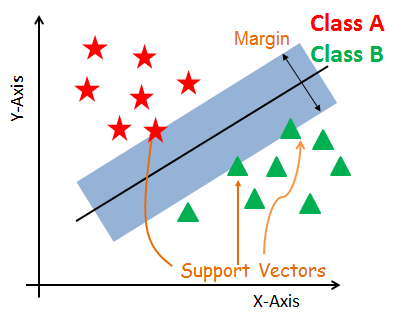

In [62]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

(60,)

In [63]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("La puntuación obtenida con SVM es: "+str(score_svm)+" %")

La puntuación obtenida con SVM es: 81.67 %


    6.1.3) KNN

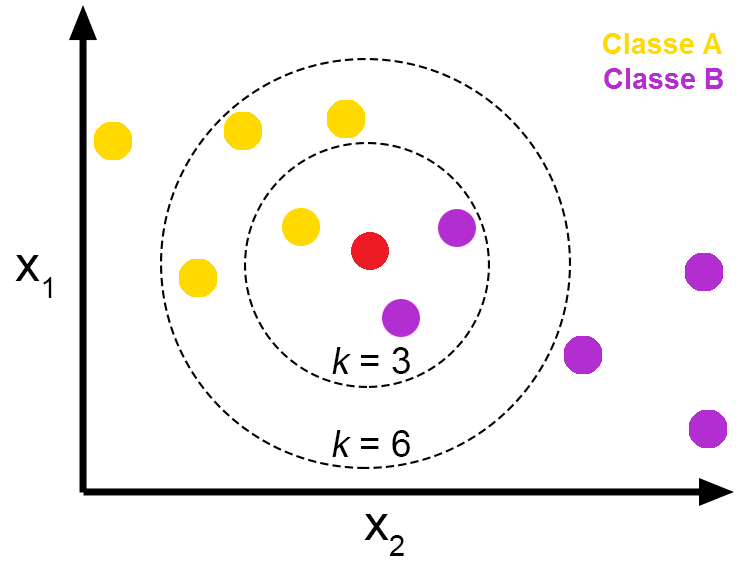

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(60,)

In [65]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("La puntuación obtenida con KNN es: "+str(score_knn)+" %")

La puntuación obtenida con KNN es: 66.67 %


    6.1.4) Decision Tree

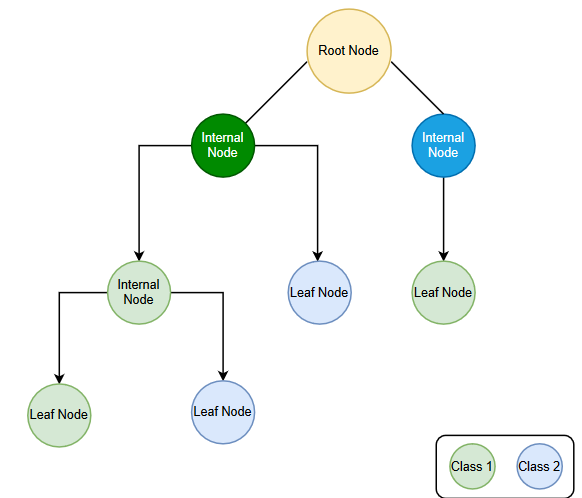

In [66]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dtree = DecisionTreeClassifier(random_state=x)
    dtree.fit(X_train,Y_train)
    Y_pred_dtree = dtree.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dtree,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
    
dtree = DecisionTreeClassifier(random_state=best_x)
dtree.fit(X_train,Y_train)
Y_pred_dtree = dtree.predict(X_test)
Y_pred_dtree.shape

(60,)

In [67]:
score_dtree = round(accuracy_score(Y_pred_dtree,Y_test)*100,2)

print("La puntuación obtenida con Decision Tree es: "+str(score_dtree)+" %")

La puntuación obtenida con Decision Tree es: 80.0 %


    6.1.5) Random Forest

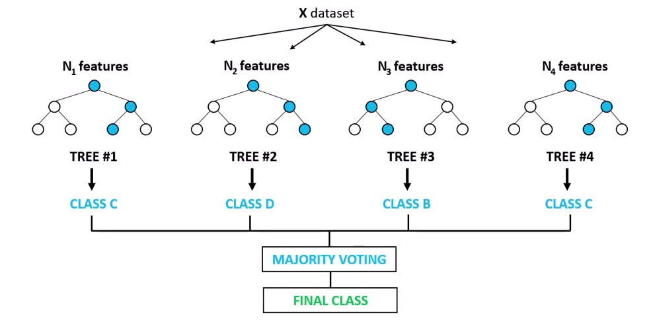

In [68]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(200):   ## Hay que utilizar un rango mayor, lo probe con 2000 pero llevaba 10min y no terminaba
    rforest = RandomForestClassifier(random_state=x)
    rforest.fit(X_train,Y_train)
    Y_pred_rforest = rforest.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rforest,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rforest = RandomForestClassifier(random_state=best_x)
rforest.fit(X_train,Y_train)
Y_pred_rforest = rforest.predict(X_test)
Y_pred_rforest.shape

(60,)

In [69]:
score_rforest = round(accuracy_score(Y_pred_rforest,Y_test)*100,2)

print("La puntuación obtenida con Random Forest es: "+str(score_rforest)+" %")

La puntuación obtenida con Random Forest es: 85.0 %


    6.2) Conclusiones con respecto a los resultados obtenidos.


##### Ahoramos vamos a comparar todos los scores obtenidos para ver que modelo tiene mayor precisión y por ende mejor desempeño, considerando que ahora tenemos una selección más amplia

In [70]:
scores = [score_lregression,score_svm,score_knn,score_dtree,score_rforest]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The puntuación obtenida con "+algorithms[i]+" es: "+str(scores[i])+" %")

The puntuación obtenida con Logistic Regression es: 81.67 %
The puntuación obtenida con Support Vector Machine es: 81.67 %
The puntuación obtenida con K-Nearest Neighbors es: 66.67 %
The puntuación obtenida con Decision Tree es: 80.0 %
The puntuación obtenida con Random Forest es: 85.0 %


##### A diferencia de nuestra selección previa ahora vemos que Random Forest saca una leve ventaja sobre la regresión logistica, no obstante esto se debe a que reducimos nuestras vueltas, por lo cual la precisicón pudo haber sido mucho mayor y seria nuestro nuevo modelo a seleccionar

*****************************************

    6.2.1) Random Forest (optimización)

#### Probamos nuevamente nuestro Random Forest pero con un numero de prueba mayor para si produce mejores resultados

In [71]:
max_accuracy = 0

for x in range(500):  
    rforestII = RandomForestClassifier(random_state=x)
    rforestII.fit(X_train,Y_train)
    Y_pred_rforestII = rforestII.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rforestII,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rforestII = RandomForestClassifier(random_state=best_x)
rforestII.fit(X_train,Y_train)
Y_pred_rforestII = rforestII.predict(X_test)

score_rforestII = round(accuracy_score(Y_pred_rforestII,Y_test)*100,2)

print("La puntuación obtenida con Random Forest es: "+str(score_rforestII)+" %")

La puntuación obtenida con Random Forest es: 85.0 %


#### Ahora vamos a hacer una comparación entre nuestro primer algoritmo seleccionado, 1) Decision Tree, nuestro segundo algoritmo seleccionado 2) Random Forest y finalmente nuestro 3) Random ForestII con un número mayor de vueltas y precisión

In [72]:
scores = [score_lregression,score_rforest, score_rforestII]
algorithms = ["Logistic Regression","Random Forest", "Random ForestII"]    

for i in range(len(algorithms)):
    print("The puntuación obtenida con "+algorithms[i]+" es: "+str(scores[i])+" %")

The puntuación obtenida con Logistic Regression es: 81.67 %
The puntuación obtenida con Random Forest es: 85.0 %
The puntuación obtenida con Random ForestII es: 85.0 %


*************************************